# seaborn
-matplotlib 기반으로 다양한 색상, 테마와 통계용 차트등의 기능을 추가한 시각화 패키지

- color <br>
https://seaborn.pydata.org/tutorial/color_palettes.html#setting-the-default-color-palette

In [29]:
import warnings # 경고 무시 설정
warnings.simplefilter(action = 'ignore')

In [60]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

In [51]:
# Matplotlib에서 한글을 사용하기 위한 설정
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt
import numpy as np

rcParams['axes.unicode_minus'] = False  # - 기호 깨짐 방지
font_fname = 'C:\\WINDOWS\\Fonts\\D2Coding-Ver1.3.2-20180524.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
print(font_family)
rc('font', family=font_family)

D2Coding


In [50]:
# matplotlib 에서 한글사용하기 위한 추가설정 - 오류발생시 단 한번만 실행
#from matplotlib import font_manager
#font_manager._rebuild()

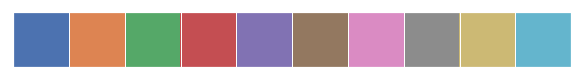

In [33]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

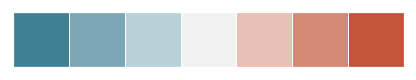

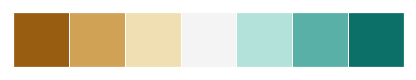

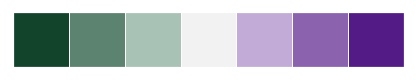

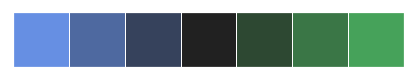

In [34]:
sns.palplot(sns.diverging_palette(220, 20, n=7))
sns.palplot(sns.color_palette("BrBG", 7))
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

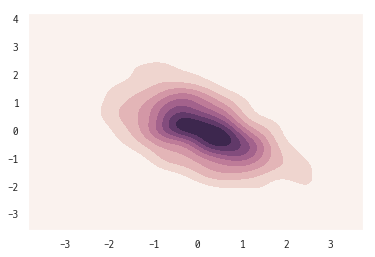

In [35]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

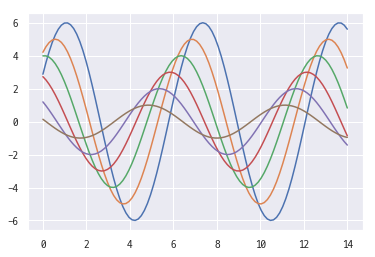

In [36]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

In [39]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [41]:
sns.load_dataset("flights").head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


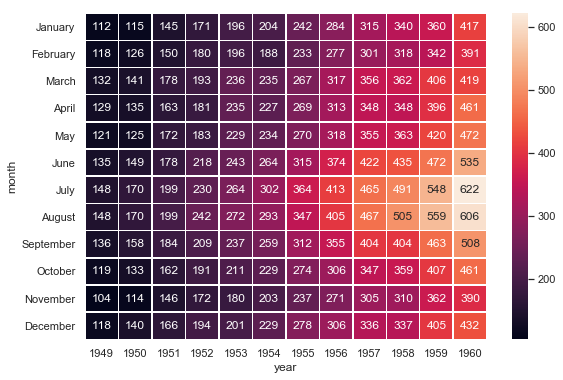

In [38]:
sns.set()

flights_long = sns.load_dataset("flights") # 탑승 인원 데이터
flights = flights_long.pivot("month", "year", "passengers")

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [56]:
tips = sns.load_dataset("tips")
tips.head(10)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [57]:
type(tips)

pandas.core.frame.DataFrame

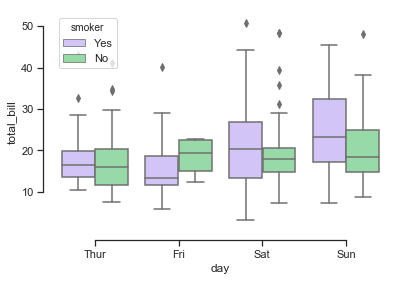

In [75]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [128]:
sns.set()
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


<class 'pandas.core.frame.DataFrame'>


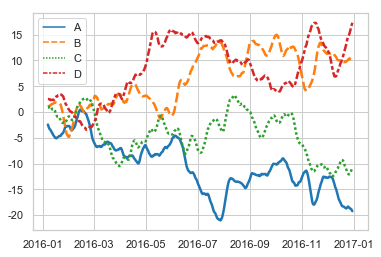

In [243]:
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [458]:
sns.set()

p = flights.pivot_table('year','month','passengers')

sns.lineplot(data=p)

ValueError: These `style` levels are missing dashes: {259, 264, 267, 269, 270, 271, 272, 274, 277, 278, 535, 284, 548, 293, 301, 302, 559, 305, 306, 310, 312, 313, 315, 317, 318, 336, 337, 340, 342, 347, 348, 606, 355, 356, 359, 360, 362, 363, 364, 622, 374, 121, 125, 126, 129, 132, 133, 390, 135, 136, 391, 140, 141, 396, 145, 146, 148, 149, 150, 404, 405, 406, 407, 413, 158, 417, 162, 163, 419, 420, 166, 422, 170, 171, 172, 432, 178, 435, 180, 181, 183, 184, 188, 191, 193, 194, 196, 199, 201, 203, 204, 461, 463, 209, 465, 211, 467, 472, 218, 227, 229, 230, 233, 234, 235, 236, 237, 491, 242, 243, 505, 508}

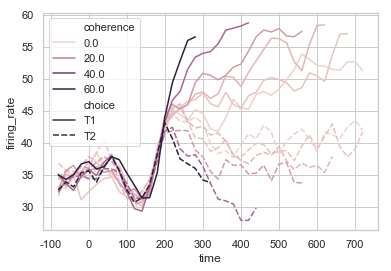

In [427]:
dots = sns.load_dataset("dots").query("align == 'dots'")
ax = sns.lineplot(x="time", y="firing_rate",hue="coherence", style="choice",data=dots)
ax